# Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data Collection & Analysis

In [ ]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('parkinsons.csv')

In [ ]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(195, 24)

In [ ]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
# getting some statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

1  --> Parkinson's Positive

0 --> Healthy


# **Visualization**

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# **Numerical Features**

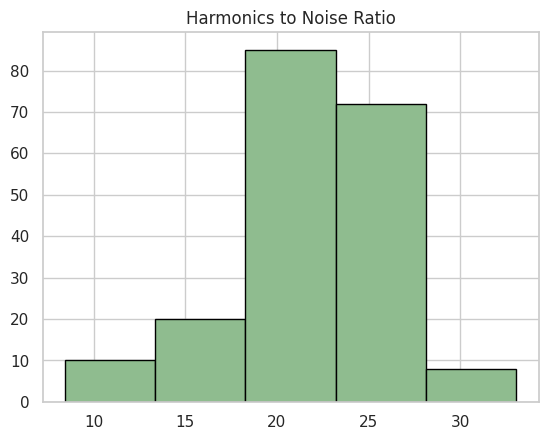

In [ ]:
plt.hist(parkinsons_data['HNR'], bins = 5, edgecolor = 'black',color='DarkSeaGreen')
plt.title('Harmonics to Noise Ratio')
plt.show()

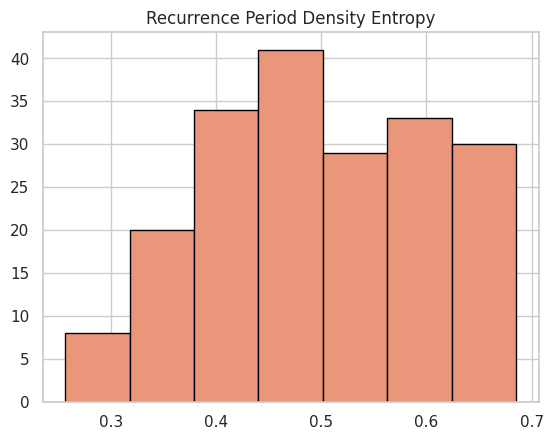

In [ ]:
plt.hist(parkinsons_data['RPDE'], bins = 7, edgecolor = 'black',color='DarkSalmon')
plt.title('Recurrence Period Density Entropy')
plt.show()

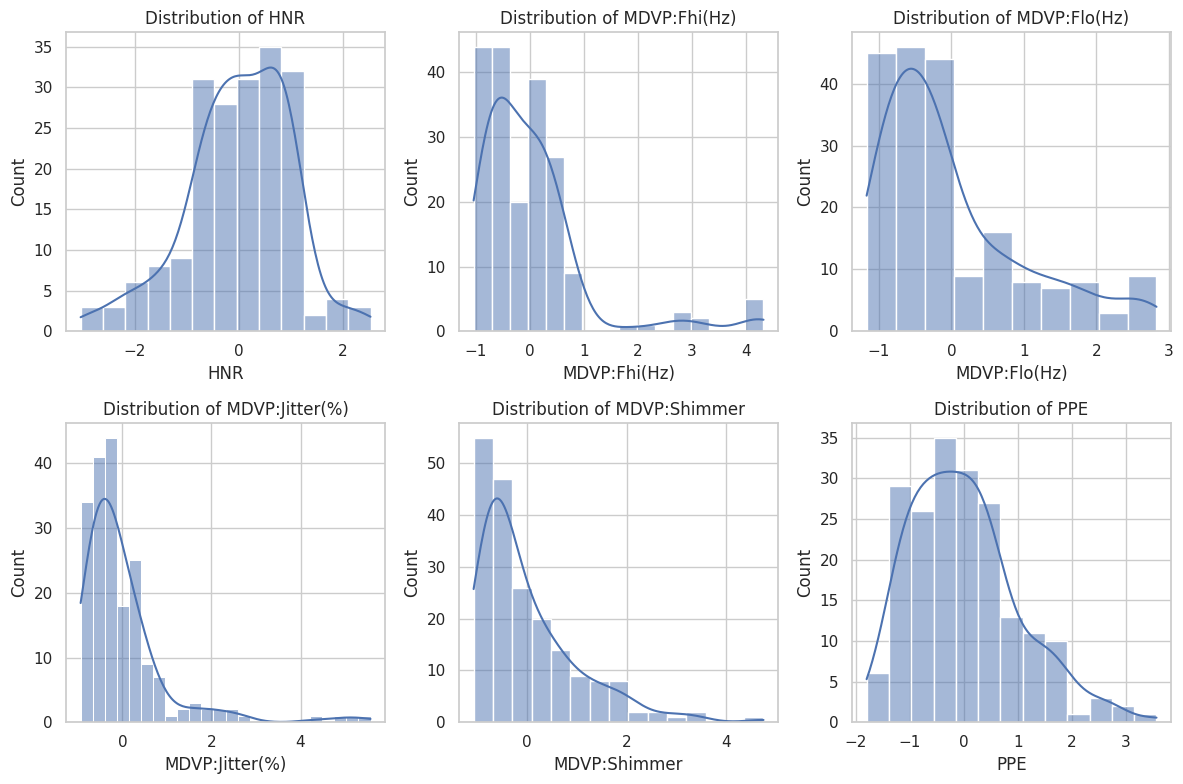

In [ ]:
numerical_features = ['HNR', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Shimmer','PPE']
scaler = StandardScaler()
parkinsons_data[numerical_features] = scaler.fit_transform(parkinsons_data[numerical_features])
sns.set(style="whitegrid")

# distribution of numerical features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(parkinsons_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# **MDVP:Jitter(%) vs. MDVP:Shimmer**
**MDVP:Jitter(%)** measures frequency variation in the voice.

**MDVP:Shimmer** measures amplitude variation in the voice.

**Rationale:** Jitter and Shimmer are fundamental measures of voice instability. Comparing these can highlight how both pitch (frequency) and volume (amplitude) stability are affected by Parkinson's disease.



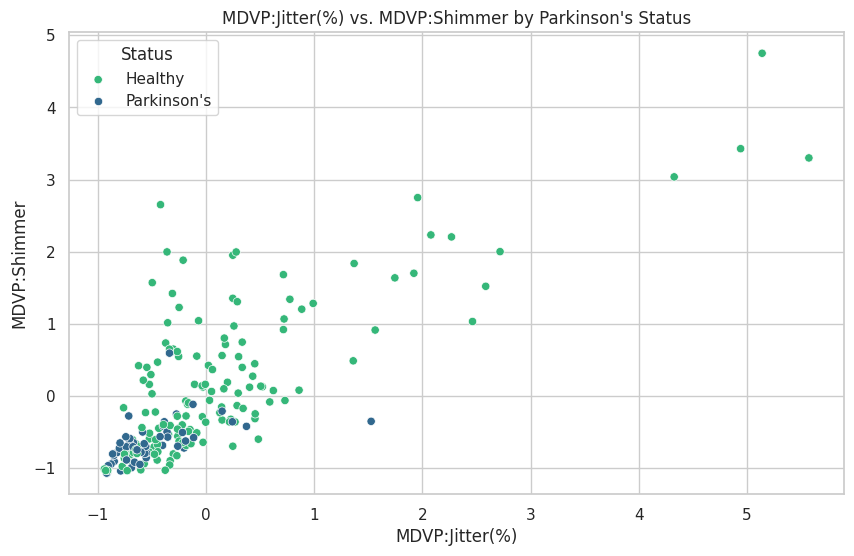

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=parkinsons_data, x='MDVP:Jitter(%)', y='MDVP:Shimmer', hue='status', palette='viridis')
plt.title('MDVP:Jitter(%) vs. MDVP:Shimmer by Parkinson\'s Status')
plt.xlabel('MDVP:Jitter(%)')
plt.ylabel('MDVP:Shimmer')
plt.legend(title='Status', labels=['Healthy', 'Parkinson\'s'])
plt.show()

# **NHR (Noise to Harmonics Ratio) vs. HNR (Harmonics to Noise Ratio)**
**NHR** measures the amount of noise in the voice signal.

**HNR** measures the clarity of the voice by comparing harmonic components to noise.

**Rationale:** These two features are inversely related but together they provide a clear picture of the vocal noise and clarity differences between Parkinson's patients and healthy individuals.

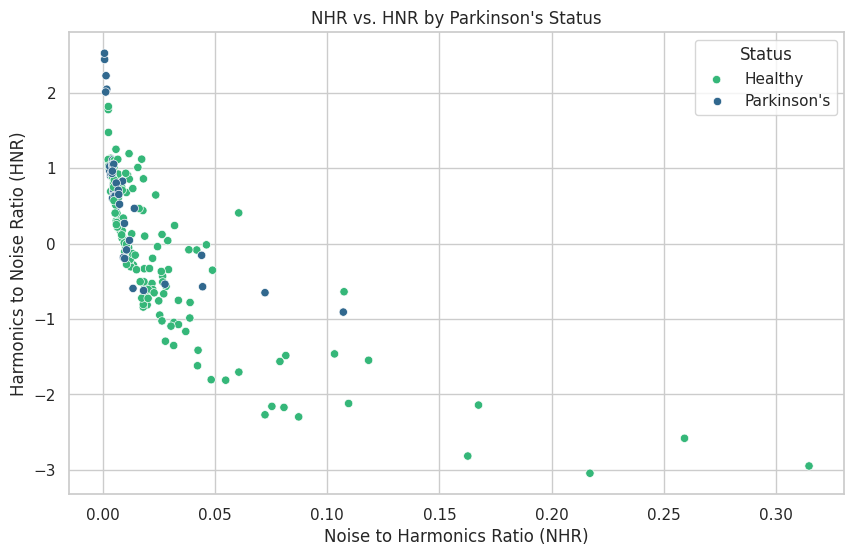

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=parkinsons_data, x='NHR', y='HNR', hue='status', palette='viridis')
plt.title('NHR vs. HNR by Parkinson\'s Status')
plt.xlabel('Noise to Harmonics Ratio (NHR)')
plt.ylabel('Harmonics to Noise Ratio (HNR)')
plt.legend(title='Status', labels=['Healthy', 'Parkinson\'s'])
plt.show()

# **RPDE (Recurrence Period Density Entropy) vs. DFA (Detrended Fluctuation Analysis)**
**RPDE** measures the irregularity of the voice signal.

**DFA** quantifies the long-range correlations in the voice signal.

**Rationale:** Both features are related to the complexity and irregularity of the voice signal. Examining their relationship can provide insights into the nonlinear dynamics of voice changes in Parkinson's patients.

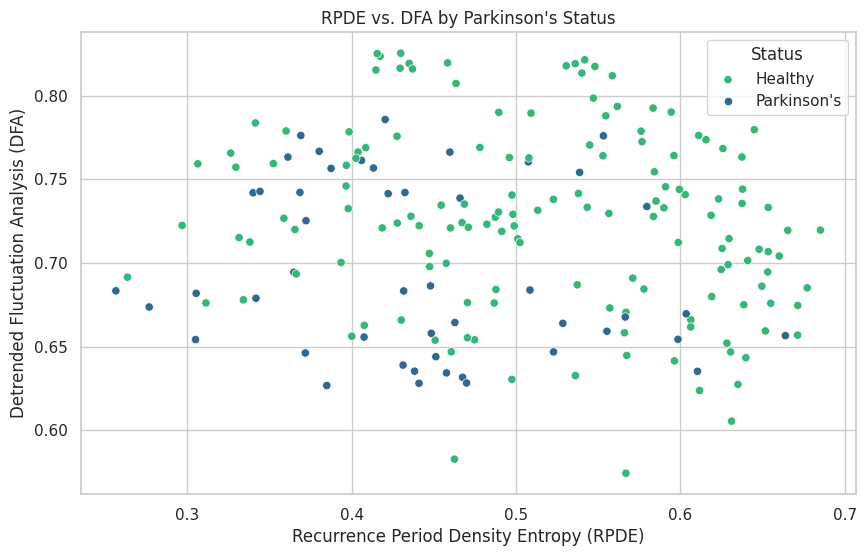

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=parkinsons_data, x='RPDE', y='DFA', hue='status', palette='viridis')
plt.title('RPDE vs. DFA by Parkinson\'s Status')
plt.xlabel('Recurrence Period Density Entropy (RPDE)')
plt.ylabel('Detrended Fluctuation Analysis (DFA)')
plt.legend(title='Status', labels=['Healthy', 'Parkinson\'s'])
plt.show()

Number of Patients not diagnosed with Parkinsons Disease: 48
Number of Patients diagnosed with Parkinsons Disease: 147


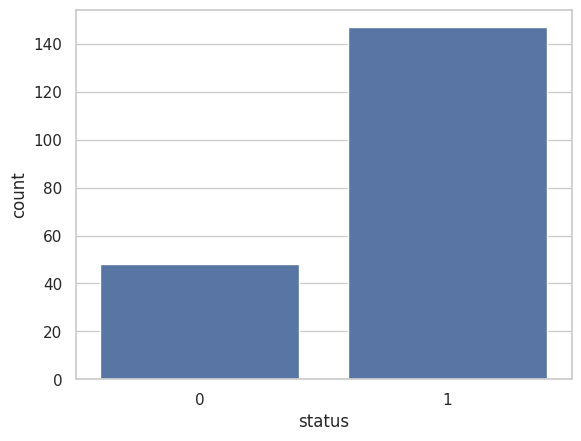

In [ ]:
f = parkinsons_data[['MDVP:Jitter(%)','MDVP:Shimmer','RPDE','DFA','NHR','HNR']]
y = parkinsons_data['status']
sns.countplot(x='status',data=parkinsons_data)
yes, no = y.value_counts()
print('Number of Patients not diagnosed with Parkinsons Disease:', no)
print('Number of Patients diagnosed with Parkinsons Disease:', yes)

# **Analysing numerical features w.r.t Target**

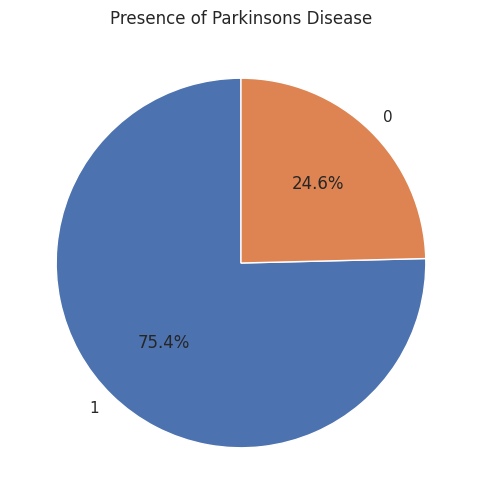

In [ ]:
plt.figure(figsize=(8, 6))
parkinsons_disease_counts = parkinsons_data['status'].value_counts()
plt.pie(parkinsons_disease_counts.values, labels=parkinsons_disease_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Presence of Parkinsons Disease')
plt.show()

# **Categorical Feature**

**Jitter Categories:** These categories represent different levels of frequency variation in the voice. Higher jitter values suggest more vocal instability, which can be associated with Parkinson's disease.

The bar chart shows how the different jitter categories are distributed between healthy individuals and Parkinson's patients. You might observe that categories with higher jitter values (e.g., **High, Very High**) are more prevalent among Parkinson's patients.

**Rationale for using this feature:**
*   Higher jitter values indicate more instability in the voice, which is a characteristic symptom of Parkinson's.
*   More sensitive to the fine motor control of vocal folds, which can detect early-stage Parkinson's disease.
*   Directly reflects the neurological control of vocal fold vibrations, making it a critical parameter for neurological disorders like Parkinson's.



Jitter_Category
Very Low     50
Very High    49
Low          48
High         48
Name: count, dtype: int64


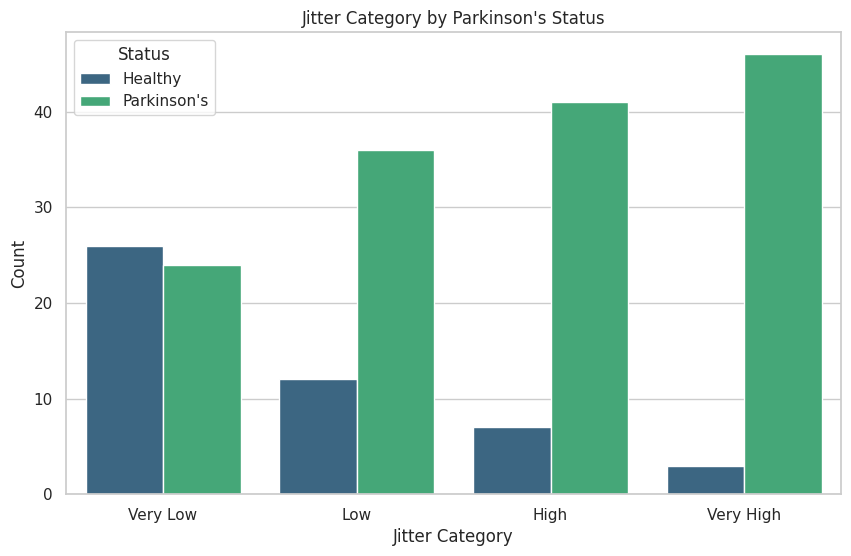

Jitter Category counts with respect to status:
status            0   1
Jitter_Category        
Very Low         26  24
Low              12  36
High              7  41
Very High         3  46


In [ ]:
# Create a categorical feature 'Jitter_Category' based on quartiles of 'MDVP:Jitter(%)'
parkinsons_data['Jitter_Category'] = pd.qcut(parkinsons_data['MDVP:Jitter(%)'], q=4, labels=['Very Low', 'Low', 'High', 'Very High'])

# Check the distribution of the new feature
print(parkinsons_data['Jitter_Category'].value_counts())

# Visualize the relationship between 'Jitter_Category' and Parkinson's status
plt.figure(figsize=(10, 6))
sns.countplot(x='Jitter_Category', data=parkinsons_data, hue='status', palette='viridis')
plt.title('Jitter Category by Parkinson\'s Status')
plt.xlabel('Jitter Category')
plt.ylabel('Count')
plt.legend(title='Status', labels=['Healthy', 'Parkinson\'s'])
plt.show()

# Print the value counts for the new feature with respect to status
jitter_counts = parkinsons_data.groupby(['Jitter_Category', 'status']).size().unstack()
print('Jitter Category counts with respect to status:')
print(jitter_counts)

**Fo Category:** Represents different levels of the average fundamental frequency of the voice.

The bar chart will show how the different frequency categories are distributed between healthy individuals and Parkinson's patients.

**Rationale for using this feature:**


*   Changes in pitch and its variability are common symptoms in Parkinson's patients.

*   Widely used in clinical settings for diagnosing and monitoring vocal changes in Parkinson's disease.



Fo_Category
Very Low     49
Low          49
Very High    49
High         48
Name: count, dtype: int64


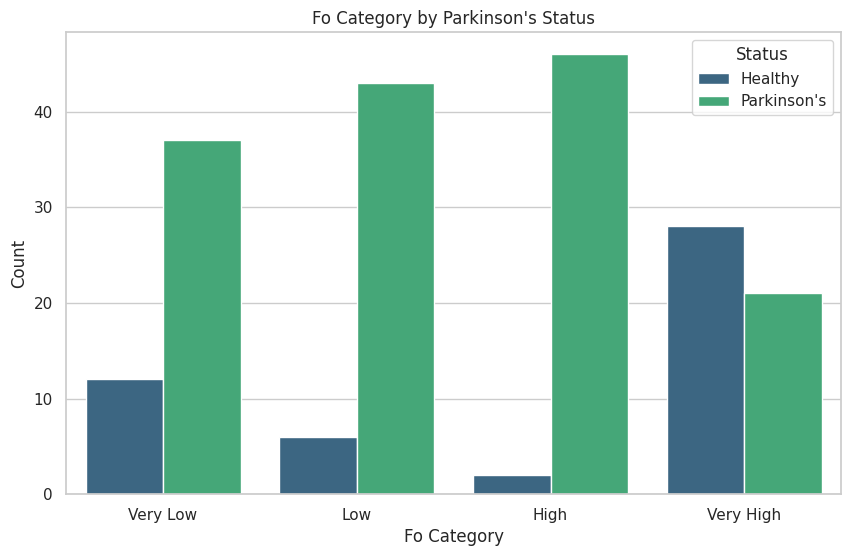

Fo Category counts with respect to status:
status        0   1
Fo_Category        
Very Low     12  37
Low           6  43
High          2  46
Very High    28  21


In [ ]:
# Create a categorical feature 'Fo_Category' based on quartiles of 'MDVP:Fo(Hz)'
parkinsons_data['Fo_Category'] = pd.qcut(parkinsons_data['MDVP:Fo(Hz)'], q=4, labels=['Very Low', 'Low', 'High', 'Very High'])

# Check the distribution of the new feature
print(parkinsons_data['Fo_Category'].value_counts())

# Visualize the relationship between 'Fo_Category' and Parkinson's status
plt.figure(figsize=(10, 6))
sns.countplot(x='Fo_Category', data=parkinsons_data, hue='status', palette='viridis')
plt.title('Fo Category by Parkinson\'s Status')
plt.xlabel('Fo Category')
plt.ylabel('Count')
plt.legend(title='Status', labels=['Healthy', 'Parkinson\'s'])
plt.show()

# Print the value counts for the new feature with respect to status
fo_counts = parkinsons_data.groupby(['Fo_Category', 'status']).size().unstack()
print('Fo Category counts with respect to status:')
print(fo_counts)


<ipython-input-89-229baa955e8a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y='MDVP:Jitter(%)', data=parkinsons_data,  palette='Set2')


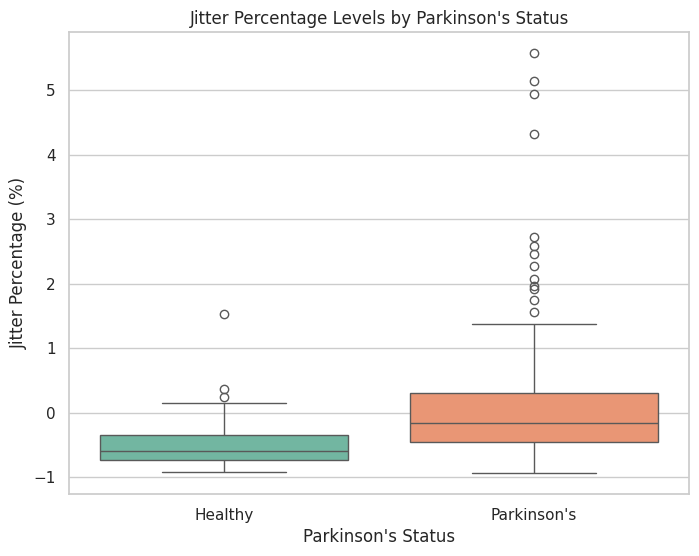

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='status', y='MDVP:Jitter(%)', data=parkinsons_data,  palette='Set2')
plt.title('Jitter Percentage Levels by Parkinson\'s Status')
plt.xlabel('Parkinson\'s Status')
plt.ylabel('Jitter Percentage (%)')
plt.xticks([0, 1], ['Healthy', 'Parkinson\'s'])
plt.show()

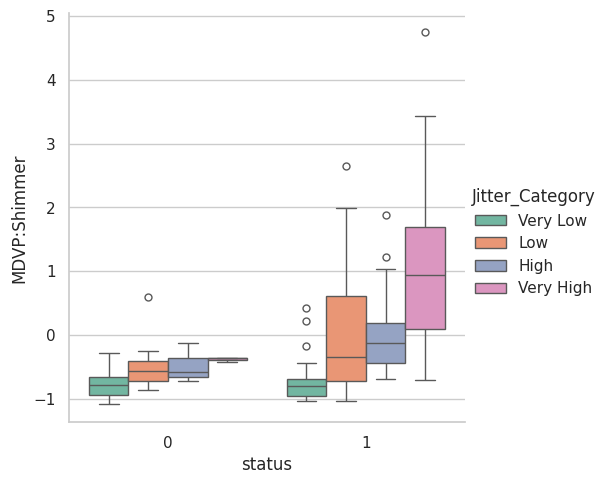

In [ ]:
sns.catplot(x = 'status', y='MDVP:Shimmer', hue='Jitter_Category',data=parkinsons_data,kind='box', palette='Set2')

<ipython-input-91-29f6e599cb2b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=parkinsons_data, palette='Set2')
<ipython-input-91-29f6e599cb2b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=parkinsons_data, palette='Set2')
<ipython-input-91-29f6e599cb2b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=parkinsons_data, palette='Set2')
<ipython-input-91-29f6e599cb2b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed

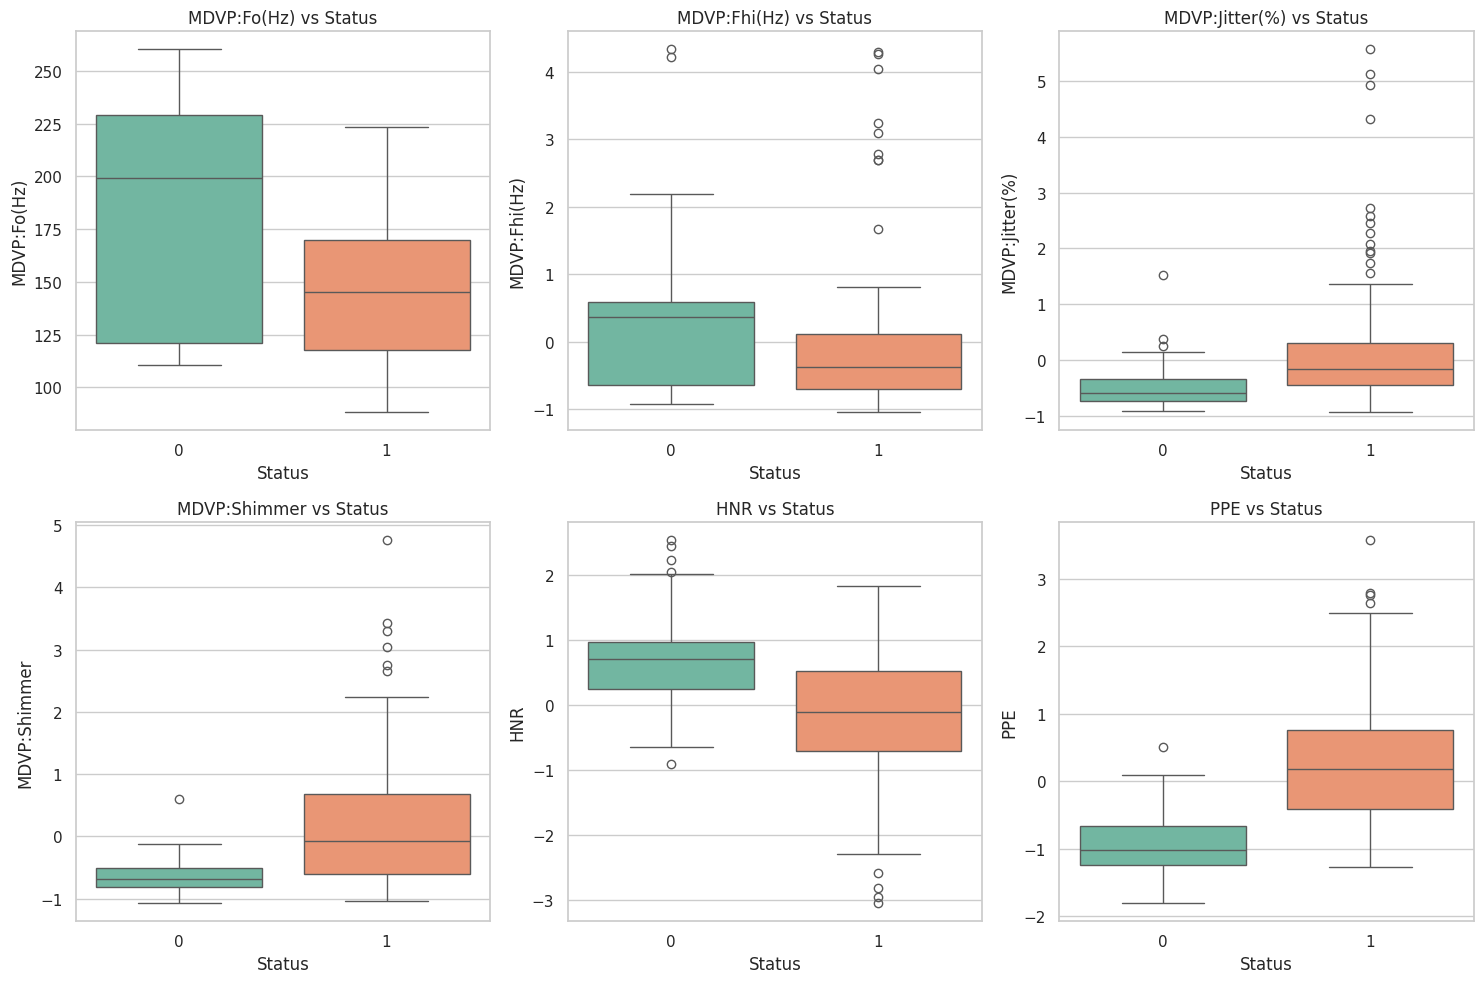

In [ ]:
numerical_features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Jitter(%)', 'MDVP:Shimmer', 'HNR', 'PPE']
target = 'status'  # Assuming 'status' is the target variable in the dataset

# Create the box plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=target, y=feature, data=parkinsons_data, palette='Set2')
    plt.xlabel('Status')
    plt.ylabel(feature)
    plt.title(f'{feature} vs Status', fontsize=12)
plt.tight_layout()
plt.show()

# **Correlation**

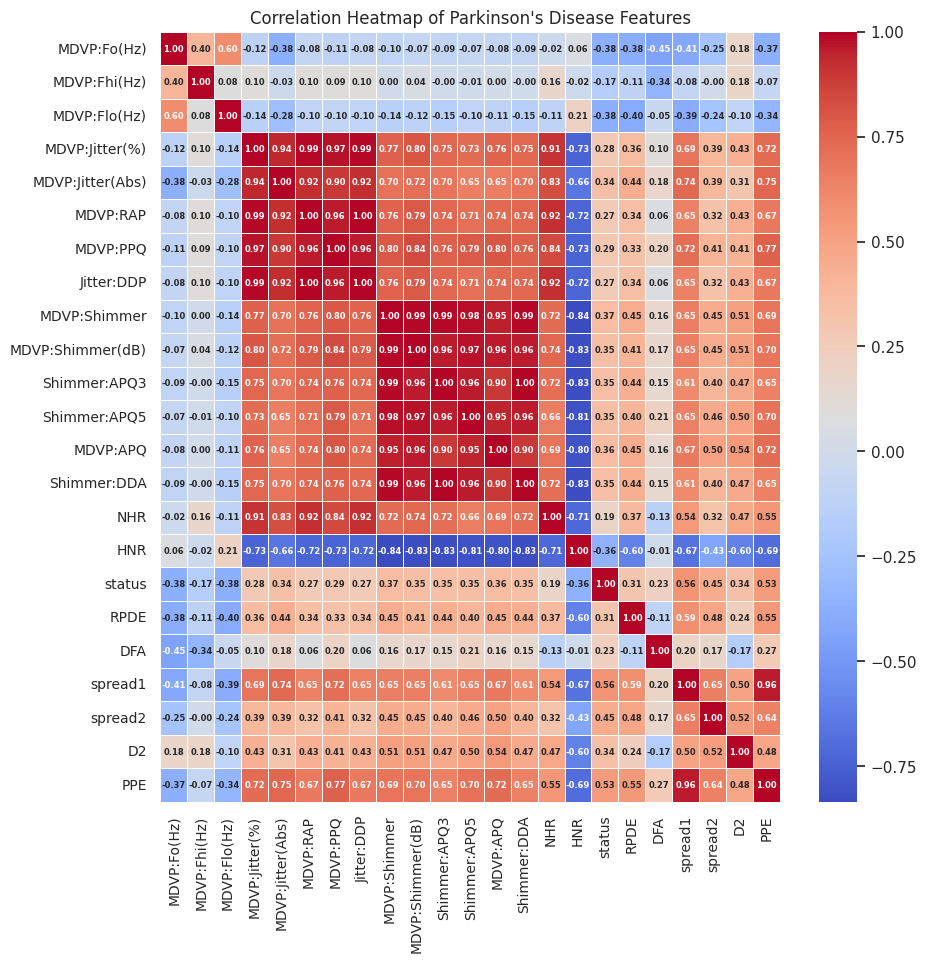

In [ ]:
df_numeric = parkinsons_data.drop(['name', 'Jitter_Category', 'Fo_Category'], axis=1)

# Set up the matplotlib figure
plt.figure(figsize=(10, 10))

# Create a heatmap with annotations, using a coolwarm color map
heatmap = sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Increase font size and adjust font spacing
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize = 10)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize = 10)
for text in heatmap.texts:
    text.set_size(6)  # Adjust font size
    text.set_weight('bold')
# Add title
plt.title('Correlation Heatmap of Parkinson\'s Disease Features')

# Display the plot
plt.show()

# **Data Pre-Processing**

Separating the features & Target



In [ ]:
X = parkinsons_data.drop(columns=['status','name','Jitter_Category','Fo_Category'], axis=1)
Y = parkinsons_data['status']

In [ ]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992     -0.436165     -0.952037        0.334914   
1        122.400     -0.530974     -0.057721        0.715418   
2        116.682     -0.723168     -0.109875        0.884991   
3        116.676     -0.649092     -0.114229        0.775389   
4        116.014     -0.606245     -0.130608        1.368893   
..           ...           ...           ...             ...   
190      174.188      0.371185     -0.508265       -0.337173   
191      209.516      0.612690     -0.618218       -0.120037   
192      174.688      0.470104     -0.968393        1.526058   
193      198.764      2.190044     -0.954180        0.243924   
194      214.289      0.692246     -0.883481       -0.113833   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109      0.745985   
1             0.00008   0.00465   0.00696     0.01394      1.681731   
2             0.00

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


# **Splitting the Data into Training data & Test Data**
Splitting the data to training data & Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


In [ ]:
print(len(X_train), len(X_test) )
print(len(Y_train), len(Y_test) )

156 39
156 39


**Models Used:**
*   Logistic Regression
*   KNN Classifier



# **Logistic Regression**

In [ ]:
# Train the Logistic Regression model with default parameters
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predict on the test data
y_pred_log_reg = log_reg.predict(X_test)

In [ ]:
# Evaluate the model
accuracy_log_reg = accuracy_score(Y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(Y_test, y_pred_log_reg)
class_report_log_reg = classification_report(Y_test, y_pred_log_reg)
print("Logistic Regression Classifier:")
print(f"Accuracy: {accuracy_log_reg:.2f}")
print("\nConfusion Matrix:\n", conf_matrix_log_reg)
print("\nClassification Report:\n", class_report_log_reg)

Logistic Regression Classifier:
Accuracy: 0.92

Confusion Matrix:
 [[ 8  2]
 [ 1 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



In [ ]:
# Evaluate on the training data to check for overfitting
X_train_prediction_log_reg = log_reg.predict(X_train)
training_data_accuracy_log_reg = accuracy_score(Y_train, X_train_prediction_log_reg)
print('Accuracy on Training data: ', round(training_data_accuracy_log_reg, 3)*100,'%')

Accuracy on Training data:  85.3 %


In [ ]:
# Evaluate on the testing data to check the generalization
test_accuracy_log_reg = accuracy_score(Y_test, log_reg.predict(X_test))
print('Test Accuracy: ', round(test_accuracy_log_reg, 3)*100,'%')

Test Accuracy:  92.30000000000001 %


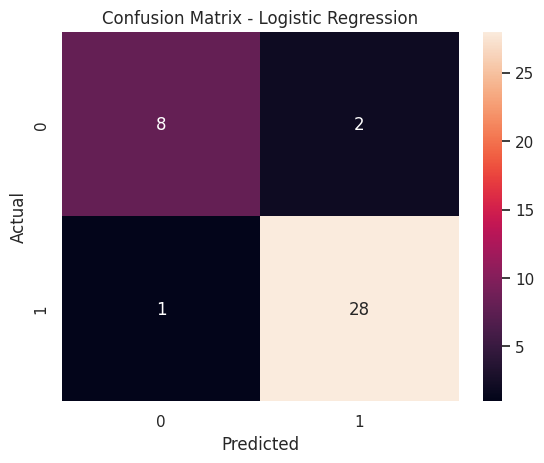

In [ ]:
# Plotting the confusion matrix
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

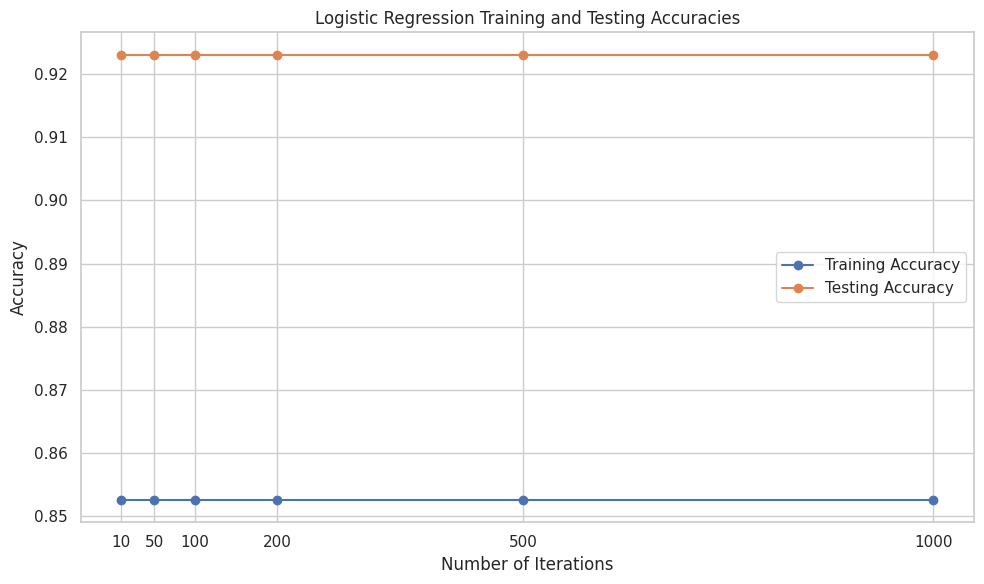

In [ ]:
# Lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []
# Iterate over different numbers of iterations
iterations = [10, 50, 100, 200, 500, 1000]

for iter in iterations:
    log_reg.max_iter = iter
     # Append to lists
    train_accuracies.append(training_data_accuracy_log_reg)
    test_accuracies.append(test_accuracy_log_reg)
# Plotting the training and testing accuracies
plt.figure(figsize=(10, 6))
plt.plot(iterations, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(iterations, test_accuracies, marker='o', label='Testing Accuracy')
plt.title('Logistic Regression Training and Testing Accuracies')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.xticks(iterations)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## **Logistic Regression without Python Package**

In [ ]:
df = pd.read_csv('parkinsons.csv')

# Identify string columns (assuming 'object' dtype for strings)
string_columns = df.select_dtypes(include='object').columns.tolist()

# Drop string columns from the DataFrame
df_numeric = df.drop(columns=string_columns)

# Save the modified DataFrame to a new CSV file
df_numeric.to_csv('parkinsons_numeric.csv', index=False)

print('CSV file with string columns removed saved successfully.')

CSV file with string columns removed saved successfully.


In [ ]:
# Features and target variable
X = parkinsons_data.drop(columns=['status','name','Jitter_Category','Fo_Category']).values
y = parkinsons_data['status'].values

In [ ]:
# Normalize the features manually
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

In [ ]:
# Split the data into training and testing sets
def train_test_split(X, y, test_size=0.2, random_state=None):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict_proba(X, weights):
    return sigmoid(np.dot(X, weights))

def predict(X, weights, threshold=0.5):
    return (predict_proba(X, weights) >= threshold).astype(int)

def logistic_regression(X, y, lr=0.01, num_iter=10000):
    weights = np.zeros(X.shape[1])
    for _ in range(num_iter):
        linear_model = np.dot(X, weights)
        y_pred = sigmoid(linear_model)
        gradient = np.dot(X.T, (y_pred - y)) / y.size
        weights -= lr * gradient
    return weights


In [ ]:
# Train the Logistic Regression model
weights = logistic_regression(X_train, y_train, lr=0.01, num_iter=10000)

In [ ]:
# Predict on the training data
y_train_pred_log_reg = predict(X_train, weights)

In [ ]:
# Predict on the test data
y_test_pred_log_reg = predict(X_test, weights)

In [ ]:
# Evaluate the model

accuracy_train_log_reg = np.mean(y_train_pred_log_reg == y_train)
accuracy_test_log_reg = np.mean(y_test_pred_log_reg == y_test)
print(f"Logistic Regression Classifier Training Accuracy: {accuracy_train_log_reg:.2f}")
print(f"Logistic Regression Classifier Testing Accuracy: {accuracy_test_log_reg:.2f}")

Logistic Regression Classifier Training Accuracy: 0.74
Logistic Regression Classifier Testing Accuracy: 0.67


In [ ]:
def confusion_matrix(y_true, y_pred):
    K = len(np.unique(y_true))  # Number of classes
    result = np.zeros((K, K), dtype=int)
    for i in range(len(y_true)):
        result[y_true[i]][y_pred[i]] += 1
    return result

conf_matrix_log_reg = confusion_matrix(y_test, y_test_pred_log_reg)
print("Confusion Matrix:\n", conf_matrix_log_reg)

Confusion Matrix:
 [[ 5  2]
 [11 21]]


In [ ]:
def classification_report(y_true, y_pred):
    K = len(np.unique(y_true))  # Number of classes
    report = ""
    conf_matrix = confusion_matrix(y_true, y_pred)
    for i in range(K):
        tp = conf_matrix[i, i]
        fp = conf_matrix[:, i].sum() - tp
        fn = conf_matrix[i, :].sum() - tp
        tn = conf_matrix.sum() - (tp + fp + fn)
        precision = tp / (tp + fp) if tp + fp > 0 else 0
        recall = tp / (tp + fn) if tp + fn > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        report += f"Class {i}:\nPrecision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}\n"
    return report

print("Classification Report:\n", classification_report(y_test, y_test_pred_log_reg))

Classification Report:
 Class 0:
Precision: 0.31, Recall: 0.71, F1-score: 0.43
Class 1:
Precision: 0.91, Recall: 0.66, F1-score: 0.76



## **Building a predictive model (logistic Regression)**


In [ ]:
input_data = input_data = (198.234, 205.678, 193.567, 0.00345, 0.00002, 0.00189, 0.00192, 0.00567, 0.01134, 0.09876, 0.00678, 0.00789, 0.00891, 0.01765, 0.00378, 27.123, 0.428934, 0.738987, -7.421567, 0.175678, 1.74789, 0.087654)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = log_reg.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have Parkinsons Disease')
else:
  print('The Person has Parkinsons Disease')

[0]
The Person does not have Parkinsons Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## **Saving train model (Logistic Regression )**

In [ ]:
import pickle

In [ ]:
filename = 'log_reg_model_parkinsons.sav'
pickle.dump(log_reg, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('log_reg_model_parkinsons.sav', 'rb'))


# **KNN Classifier**

In [ ]:
# Train the KNN model with a manually specified number of neighbors
n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Predict on the test data
y_pred_knn = knn.predict(X_test)

In [ ]:
# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

print("K-Nearest Neighbors Classifier:")
print(f"Accuracy: {accuracy_knn:.2f}")
print("\nConfusion Matrix:\n", conf_matrix_knn)
print("\nClassification Report:\n", class_report_knn)


K-Nearest Neighbors Classifier:
Accuracy: 0.92

Confusion Matrix:
 [[ 6  1]
 [ 2 30]]

Classification Report:
 Class 0:
Precision: 0.75, Recall: 0.86, F1-score: 0.80
Class 1:
Precision: 0.97, Recall: 0.94, F1-score: 0.95



In [ ]:
# Evaluate on the training data to check for overfitting
X_train_prediction_knn = knn.predict(X_train)
training_data_accuracy_knn = accuracy_score(y_train, X_train_prediction_knn)
print('Accuracy on Training data: ', round(training_data_accuracy_knn, 3)*100,'%')

Accuracy on Training data:  97.39999999999999 %


In [ ]:
# Evaluate on the testing data to check the generalization
test_accuracy_knn = accuracy_score(y_test, knn.predict(X_test))
print('Test Accuracy: ', round(test_accuracy_knn, 3)*100,'%')

Test Accuracy:  92.30000000000001 %


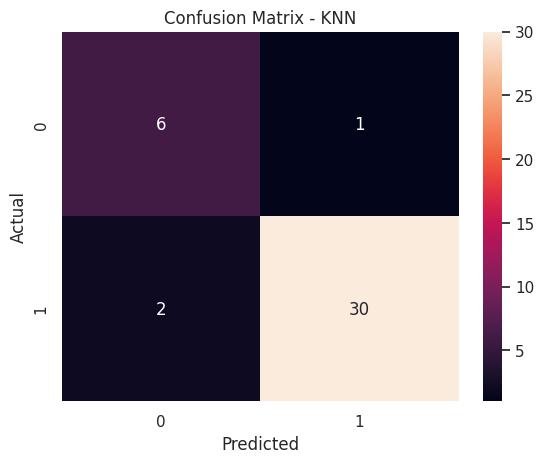

In [ ]:
# Plotting the confusion matrix
sns.heatmap(conf_matrix_knn, annot=True, fmt='d')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


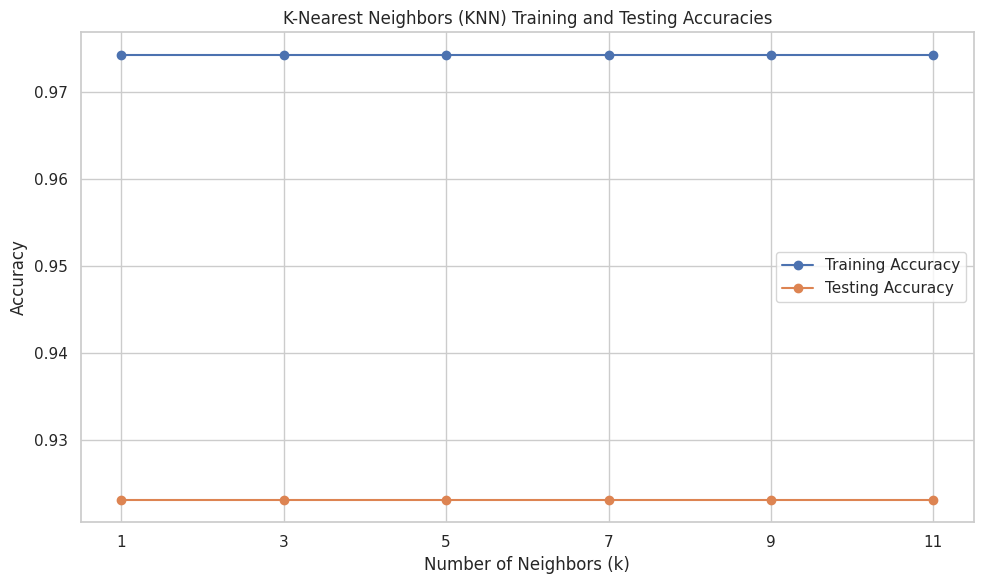

In [ ]:
# Lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Iterate over different values of k
neighbors = [1, 3, 5, 7, 9, 11]

for k in neighbors:
    # Set number of neighbors
    knn.n_neighbors = k

    # Append to lists
    train_accuracies.append(training_data_accuracy_knn)
    test_accuracies.append(test_accuracy_knn )

# Plotting the training and testing accuracies
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(neighbors, test_accuracies, marker='o', label='Testing Accuracy')
plt.title('K-Nearest Neighbors (KNN) Training and Testing Accuracies')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## **Without Package**

In [ ]:
# Features and target variable
X = parkinsons_data.drop(columns=['status','name','Jitter_Category','Fo_Category']).values
y = parkinsons_data['status'].values

In [ ]:
# Normalize the features manually
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

In [ ]:
# Split the data into training and testing sets
def train_test_split(X, y, test_size=0.2, random_state=None):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def knn_predict(X_train, y_train, X_test, k=3):
    y_pred = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, x) for x in X_train]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        y_pred.append(most_common)
    return np.array(y_pred)

In [ ]:
# Predict on the training data
y_train_pred_knn = knn_predict(X_train, y_train, X_train, k=3)

In [ ]:
# Predict on the test data
y_test_pred_knn = knn_predict(X_train, y_train, X_test, k=3)

In [ ]:
# Evaluate the model
accuracy_train_knn = np.mean(y_train_pred_knn == y_train)
accuracy_test_knn = np.mean(y_test_pred_knn == y_test)
print(f"K-Nearest Neighbors Classifier Training Accuracy: {accuracy_train_knn:.2f}")
print(f"K-Nearest Neighbors Classifier Testing Accuracy: {accuracy_test_knn:.2f}")

K-Nearest Neighbors Classifier Training Accuracy: 0.97
K-Nearest Neighbors Classifier Testing Accuracy: 0.92


In [ ]:
def confusion_matrix(y_true, y_pred):
    K = len(np.unique(y_true))  # Number of classes
    result = np.zeros((K, K), dtype=int)
    for i in range(len(y_true)):
        result[y_true[i]][y_pred[i]] += 1
    return result

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", conf_matrix_knn)

Confusion Matrix:
 [[ 6  1]
 [ 2 30]]


In [ ]:
def classification_report(y_true, y_pred):
    K = len(np.unique(y_true))  # Number of classes
    report = ""
    for i in range(K):
        tp = conf_matrix_knn[i, i]
        fp = conf_matrix_knn[:, i].sum() - tp
        fn = conf_matrix_knn[i, :].sum() - tp
        tn = conf_matrix_knn.sum() - (tp + fp + fn)
        precision = tp / (tp + fp) if tp + fp > 0 else 0
        recall = tp / (tp + fn) if tp + fn > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        report += f"Class {i}:\nPrecision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}\n"
    return report

print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Classification Report:
 Class 0:
Precision: 0.75, Recall: 0.86, F1-score: 0.80
Class 1:
Precision: 0.97, Recall: 0.94, F1-score: 0.95



## **Building a Predictive System (KNN Classifier)**

In [ ]:
input_data =(197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = knn.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Parkinsons Disease')
else:
  print('The Person has Parkinsons Disease')

[0]
The Person does not have a Parkinsons Disease


# **Saving the trained model  (KNN Classifier)**

In [ ]:
filename = 'knn_model_parkinsons.sav'
pickle.dump(knn, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('knn_model_parkinsons.sav', 'rb'))